# Case Study 2(Bellabeat): How Can a Wellness Technology Company Play It Smart?


Introduction

Welcome to the Bellabeat data analysis case study! In this case study, you will perform many real-world tasks of a junior data analyst. You will imagine you are working for Bellabeat, a high-tech manufacturer of health-focused products for women, and meet different characters and team members. In order to answer the key business questions, you will follow the steps of the data analysis process: ask, prepare, process, analyze, share, and act. Along the way, the Case Study Roadmap tables — including guiding questions and key tasks — will help you stay on the right path.

## 1. ASK

Background

Bellabeat is a prominent contender in the global smart device industry, specializing in the production of cutting-edge health-focused products designed for women. Founded in 2013 by Urska Srsen and Sando Mur, the company offers four products that gather data on activity, sleep, stress, and reproductive health. These products empower women by providing valuable insights into their health and lifestyle habits.

The project's main objective is to analyze usage data of non-Bellabeat smart devices to gain valuable insights into consumer behavior. The findings will be utilized to formulate an effective marketing strategy for the company.

Key Questions:
1. What are the prevailing trends in the utilization of smart devices?
2. How might these trends be relevant to Bellabeat's customer base?
3. How can these trends be leveraged to shape Bellabeat's marketing strategy?

Deliverables:
1. An overview of the business objective
2. A description of the data sources employed
3. Documentation of any data cleaning or manipulation conducted
4. A summary of the analysis performed
5. General content recommendations derived from the analysis.

## 2. Prepare
The data utilized in this analysis originates from Kaggle and involves Fitbit Fitness Tracker data. The data was collected through a survey conducted via Amazon Mechanical Turk between 12th March and 12th May 2016. It comprises personal fitness tracker information from thirty Fitbit users who provided their consent for the submission of personal tracking data. The data includes daily activity, step count, and heart rate measurements. The information is stored in 18 CSV files.

### Data Integrity
Data Limitations

The data was gathered in 2016, and its relevance may have diminished due to potential changes in users' activity, sleep patterns, and health habits over the years. The sample size of 30 is insufficient to accurately represent the entire population of female Fitbit users. Furthermore, the dataset lacks additional user information, such as age, which is crucial for conducting comprehensive health and wellness analyses. Considering these factors is essential when interpreting and applying the findings from this dataset.

A good data source should be reliable, original, comprehensive, current, and properly cited (ROCCC). Let's evaluate the Fitbit User Data against these criteria:
1. Unreliable - The data has a small sample size, which may not accurately represent the entire population.
2. Not original - The data is sourced from a third party and not directly collected by Bellabeat.
3. Comprehensive - The data matches the type of information collected by Bellabeat products.
4. Not current - The data was collected over 5 years ago, making it less relevant to the current trends and behaviors.
5. Not cited - The data is from a third-party source and lacks proper citation.

Based on these evaluations, the Fitbit User Data does not fully meet the ROCCC criteria, and its limitations should be taken into consideration when using it for analysis or decision-making.

## 3. Process
R programming is used for data cleaning, transformation, analysis and visualization.

### Installing and loading common packages and libraries

In [1]:
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(dplyr)
library(ggplot2)
library(lubridate)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at C:/Users/Erlangga/Documents/Sertifikat/Google Data Analytics Professional Certificate/Portofolio/casestudy2


Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test




### Importing data into R
Here we created data frames named ‘daily_activity’ and ‘sleep_day’ by reading the CSV files from the data sets.

In [2]:
daily_activity <- read.csv("fitabasedata/dailyActivity_merged.csv")
sleep_day <- read.csv("fitabasedata/sleepDay_merged.csv")

### Exploring a few key tables
Check basic information about the data: column names, no of observations, data type, formatting and number of missing values.

Take a look at the daily_activity data.

In [3]:
head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Identify all the columns in the daily_activity data.

In [4]:
colnames(daily_activity)

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

Take a look at the sleep_day data.

In [5]:
head(sleep_day)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


Identify all the columns in the daily_activity data.

In [6]:
colnames(sleep_day)

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

“User Id” field appears in daily_activity and sleep_day.It can therefore be used to merge the two data sets.

### Data cleaning
To ensure the data id clean before analysis, it is checked for: missing value, errors, misspellings,duplicates etc. The data is then cleaned and transformed.

#### Check data info

In [7]:
str(daily_activity)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

In [8]:
str(sleep_day)

'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


#### Check for missing values

In [9]:
which(is.na(daily_activity))

integer(0)

In [10]:
which(is.na(sleep_day))

integer(0)

#### Check number of unquie participants

In [11]:
n_distinct(daily_activity$Id)

[1] 33

In [12]:
n_distinct(sleep_day$Id)

[1] 24

Data Summary
1. There are 33 unique user IDs in the activity data, rather than the expected 30.
2. The daily activity data set has more participants compared to the sleep data set, with only 24 user IDs.
3. The data type for the "Activity Date" is listed as "char" instead of the expected "Date" data type.
4. There are no missing values in the dataset.

## 4. Analyze
### Summary statistics
Check for observations in each data frame.

In [13]:
nrow(daily_activity)

[1] 940

In [14]:
nrow(sleep_day)

[1] 413

Quick summary statistics about each data frame.

For the daily activity data frame:

In [15]:
daily_activity %>%  
  select(TotalSteps,
         SedentaryMinutes,Calories) %>%
  summary()

   TotalSteps    SedentaryMinutes    Calories   
 Min.   :    0   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :1440.0   Max.   :4900  

According to the summary, the average user:
1. Takes 7406 steps per day, which falls short of the CDC's recommended goal of 10,000 steps per day.
2. Spends approximately 1057 out of 1440 minutes per day being inactive.
3. Burns a total of 2304 calories in a day.

For the sleep data frame:

In [16]:
sleep_day %>%  
  select(TotalSleepRecords,
  TotalMinutesAsleep,
  TotalTimeInBed) %>%
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

According to the summary, the average user:
1. Records their sleep data at least once daily.
2. Spends approximately 458 minutes (around 8 hours) in bed and 419 minutes (around 7 hours) asleep each day.

### Identifying trends and relationships
#### Explore the relationship between steps and sedentary minutes
What’s the relationship between steps taken in a day and sedentary minutes? How could this help inform the customer segments that we can market to? E.g. position this more as a way to get started in walking more? Or to measure steps that they are already taking?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


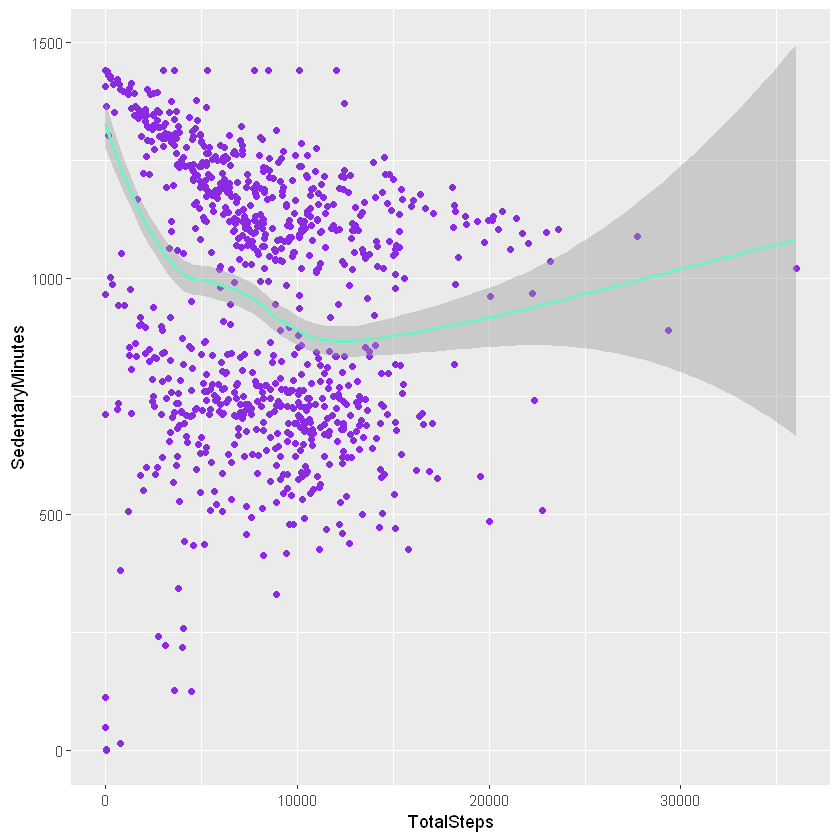

In [17]:
ggplot(data=daily_activity, aes(x=TotalSteps, y=SedentaryMinutes)) + geom_point(colour="blueviolet") + geom_smooth(color = "aquamarine2")

The scatter plot above shows that between 0- 10 000 steps, sedentary minutes decreases with increasing steps. The more daily steps a user takes, the less time they spend seated or inactive. The device can include a pop up that notifies a user when they have been inactive for 1 hour and encourage them to move.

#### Explore the relatonship between total minutes asleep and total time in bed.
What’s the relationship between total minutes asleep and time in bed? Is it almost linear? Are there any unexpected trends? How could this help inform the customer segments that we can market to? E.g position this as getting into bed earlier as a way to get adequate rest? Or to measure sleeping patterns?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


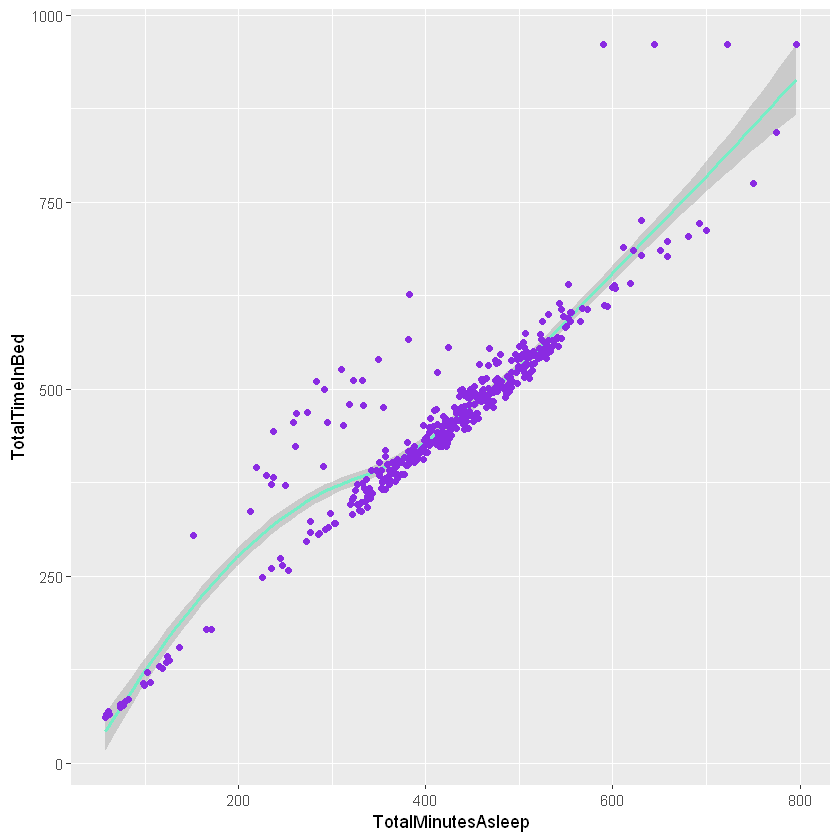

In [18]:
ggplot(data=sleep_day) + geom_smooth(mapping= aes(x=TotalMinutesAsleep, y=TotalTimeInBed),color = "aquamarine2") + geom_point(mapping= aes(x=TotalMinutesAsleep, y=TotalTimeInBed),color= "blueviolet")

The scatter plot above shows a positive correlation between time spend asleep and time spend in bed. This can be used to encourage users to get into bed earlier in order to get the recommend amount of sleep. By tracking the time spend asleep, users can also measure their sleeping patterns and make necessary adjustments to improve their sleeping habits.

#### Explore the relatonship between total steps and calories.
What’s the relationship between step count and calories? How could this help inform the customer segments that we can market to? E.g Does taking more steps lead to increased calories ? Use steps count to assist weight loss ?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


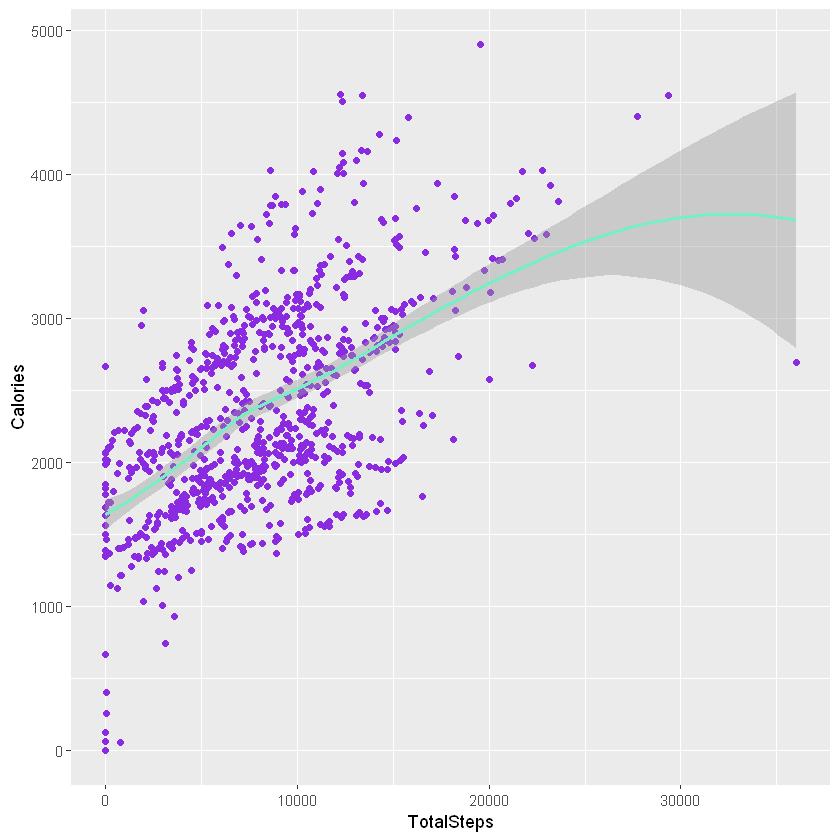

In [19]:
ggplot(data=daily_activity, aes(x =TotalSteps, y=Calories)) + geom_point(color= "blueviolet") +geom_smooth(color = "aquamarine2")

between the number of steps and calories burnt. This can be used to target users who are looking to loose or maintain weight to increase their daily steps as a way to burn more calories and get closer to their weight goals.

#### Merging these two datasets together
Since there are more participant Ids in the daily activity data set than in the sleep day data set, an outer join is used to merge the two data sets without filtering out any Ids.

In [20]:
combined_data <- merge(sleep_day, daily_activity, all = TRUE)

In [21]:
colnames(combined_data)

[1] "Id"                       "SleepDay"                
 [3] "TotalSleepRecords"        "TotalMinutesAsleep"      
 [5] "TotalTimeInBed"           "ActivityDate"            
 [7] "TotalSteps"               "TotalDistance"           
 [9] "TrackerDistance"          "LoggedActivitiesDistance"
[11] "VeryActiveDistance"       "ModeratelyActiveDistance"
[13] "LightActiveDistance"      "SedentaryActiveDistance" 
[15] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[17] "LightlyActiveMinutes"     "SedentaryMinutes"        
[19] "Calories"

Take a look at how many participants are in this combined data set.

In [22]:
n_distinct(combined_data$Id)

[1] 33

#### Explore user activity in minutes
What activities are people mostly logging into their smart devices? How does this relate to the market segment we are trying to target? E.g Get people to track their daily workouts at home, gym or outdoor ?

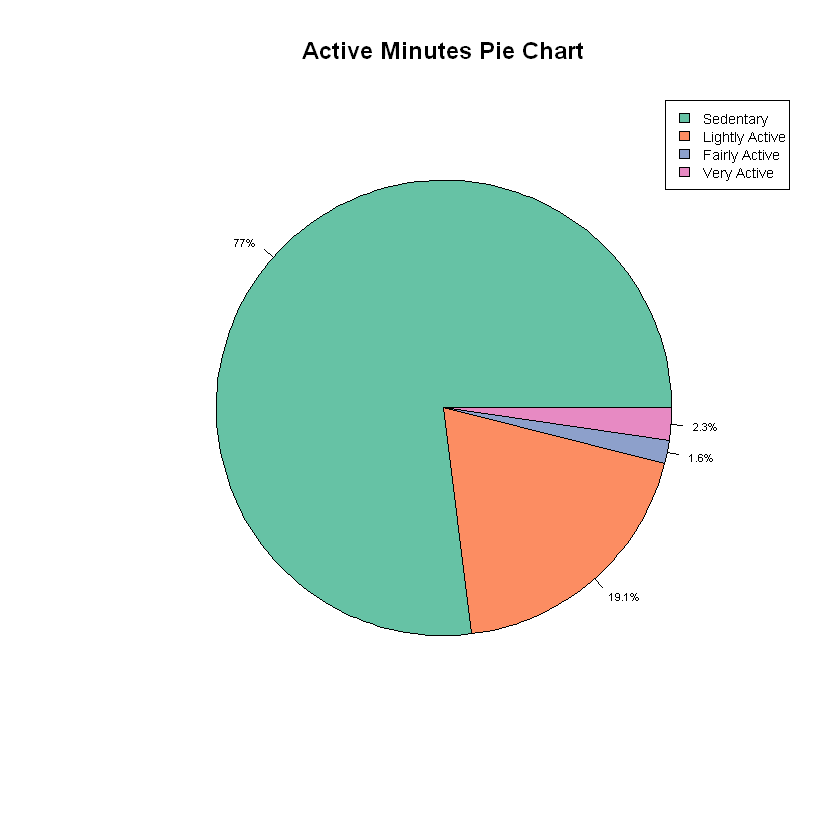

In [23]:
Sedentary <- sum(combined_data$SedentaryMinutes)
Active <- sum(combined_data$VeryActiveMinutes)
Fairly <- sum(combined_data$FairlyActiveMinutes)
Lightly <- sum(combined_data$LightlyActiveMinutes)

x <- c(Sedentary,Lightly,Fairly,Active)
labels <- c("Sedentary", "Lightly Active", "Fairly Active", "Very Active")

piepercent <- round(100*x/sum(x),1)

labels <- paste0(piepercent,"%")

colour = brewer.pal(length(piepercent), "Set2")

pie(x,labels ,main = "Active Minutes Pie Chart",col =colour,cex = 0.55)

legend("topright",c("Sedentary", "Lightly Active", "Fairly Active", "Very Active"),cex = 0.7, fill = colour)

The pie char chart above shows that users spend 81.3 % of their time in a day inactive and only 1.7 % involved in a very active state. This can be used to encourage users to increase their daily active minutes and reduce sedentary minutes by being more active through the day. Taking the stairs instead of the elevator, joining a local gym or yoga club, walking to the nearest grocery store instead of driving etc are some of the activities users can be encouraged to do while keeping track of their daily active minutes.

#### Explore activity frequency throughout the week
Does daily activity vary with the day of the week ? How could this help inform the customer segments that we can market to? E.g. position this more as a way to get people to do outdoor activities during the weekend such as hiking or tennis etc? Or to measure steps that you’re already taking to ensure consistent activity through the week?

#### Change ActivityDate To Date Format
Add a new column in the data frame converting ‘char’ into ‘Date’. Check updated column names.

In [24]:
combined_data$ActivityDate2 <- mdy(combined_data$ActivityDate)

colnames(combined_data)

[1] "Id"                       "SleepDay"                
 [3] "TotalSleepRecords"        "TotalMinutesAsleep"      
 [5] "TotalTimeInBed"           "ActivityDate"            
 [7] "TotalSteps"               "TotalDistance"           
 [9] "TrackerDistance"          "LoggedActivitiesDistance"
[11] "VeryActiveDistance"       "ModeratelyActiveDistance"
[13] "LightActiveDistance"      "SedentaryActiveDistance" 
[15] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[17] "LightlyActiveMinutes"     "SedentaryMinutes"        
[19] "Calories"                 "ActivityDate2"

Add a new column in the data frame converting activity date into days of the week. Check new column.

In [25]:
combined_data$weekday <- wday(combined_data$ActivityDate2, label = TRUE)

head(combined_data$weekday)

[1] Sab Jum Min Sab Sel Rab
Levels: Min < Sen < Sel < Rab < Kam < Jum < Sab

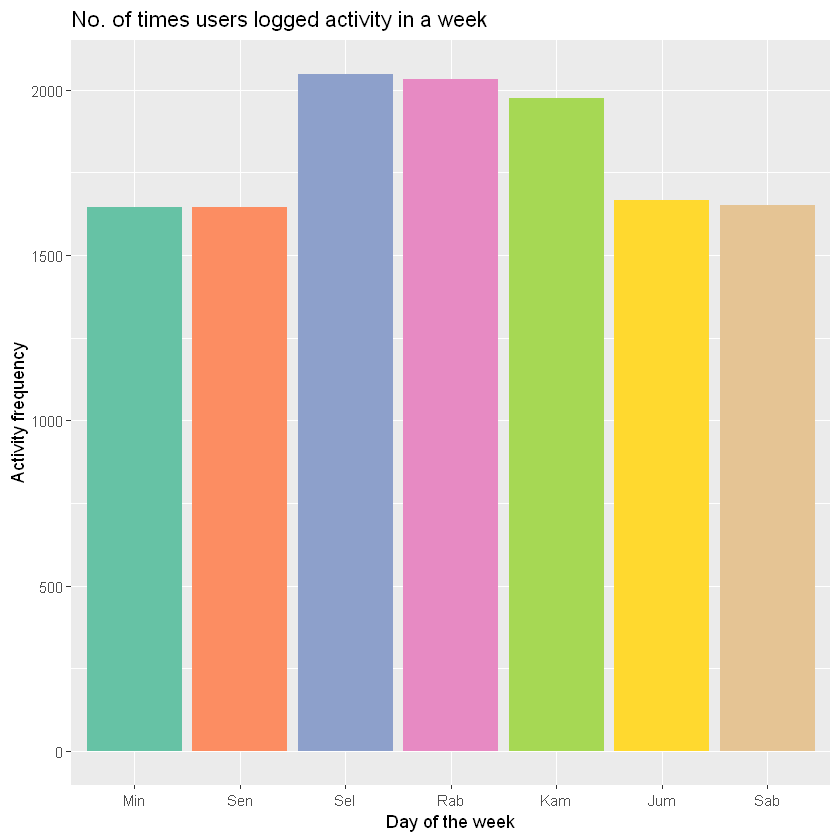

In [26]:
ggplot(data = combined_data, aes( x= weekday)) + geom_bar(fill =brewer.pal(7,"Set2")) + labs(title = "No. of times users logged activity in a week ", x = "Day of the week", y ="Activity frequency")

As can be seen from the bar chart above, user daily activity varies throughout the week. Activity is high midweek between Tuesday and Thursday. The frequency drops towards the weekend and on Mondays. This can be used to encourage users to do fun activities during the weekend such as hiking,running a marathon or joining a sports team in their area. Measuring their activity will ensure consistent activity frequency throughout the week.

## 5. SHARE
Based on the analysis, for the market segment the company is aiming to reach:
1. There is a negative correlation between total steps and sedentary minutes, implying that as the number of steps taken increases, the amount of time spent in sedentary activities decreases.
2. There is a positive correlation between total steps and calories burnt, indicating that higher step counts are associated with increased calorie expenditure.
3. There is a positive correlation between the time spent in bed and the time spent asleep, suggesting that users who spend more time in bed tend to have longer durations of sleep.
4. On average, users logged 81.3% of their time as sedentary minutes and less than 20% of their time as active minutes (15.8% lightly active, 1.7% fairly active, and 1.1% very active).
5. Daily activity is higher during the middle of the week and slightly reduces from Friday until Monday, indicating potential fluctuations in users' activity levels throughout the week.

## 6. ACT
Based on the findings, the following high-level content recommendations can be made to the marketing strategy team:
1. Raise Awareness: Educate users about the negative consequences of insufficient physical activity and encourage them to monitor their daily active minutes using Bellabeat devices.
2. Set Step Goals: Motivate users to set daily step goals of at least 10,000 and utilize their devices to track progress throughout the day. Emphasize how achieving these goals can lead to increased calorie burning, aiding in weight management and reducing sedentary behavior.
3. Stay Active Throughout the Week: Encourage users to maintain physical activity levels consistently, including on weekends. Encourage the use of Bellabeat devices to monitor daily active minutes and step counts as a means to stay active every day.
4. Promote Sleep Health: Educate users about the benefits of quality sleep and the negative effects of sleep deprivation. Highlight how Bellabeat devices can assist in tracking sleeping patterns to improve overall sleep health.
5. Prioritize Sleep: Encourage users to establish healthy sleep habits, including going to bed earlier, to ensure they get sufficient rest. Promote the use of Bellabeat devices to monitor sleep patterns and aid in achieving better sleep quality.